#    

In [296]:
%reset -f
# globals()

In [1]:
import sys
sys.path.append('C:/Users/I/Desktop/jupy1/src/') # markovchain.py

In [2]:
import random
from math import sqrt, sin, cos, exp, pow, pi, log
import handcalcs.render
import numpy as np
import sympy as sp
from sympy import Symbol as symbol
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
PD = 184
import scipy.stats as stats
from scipy import integrate
%matplotlib inline
from markovchain import MarkovChain as MC
from tabulate import tabulate

# Завдання 1

Розглянемо процес функціонування системи автомобіля. Нехай автомобіль (система) протягом однієї зміни (доби) може знаходитися в одному з двох станів: справному (S_1) і несправному (S_2). В результаті проведення масових спостережень за роботою автомобіля складена наступна матриця ймовірностей переходів.
<br>Граф станів : |Р_ij| =[[0.8, 0.2], [0.9, 0.1]]
<br>P_11 = 0.8 - ймовірність того, що автомобіль залишиться у справному стані;
<br>P_12 = 0.2 - ймовірність переходу автомобіля зі стану «справний» в стан «несправний»;
<br>P_21 = 0.9 - ймовірність переходу автомобіля зі стану «несправний» в стан «справний»;
<br>P_22 = 0.1 - ймовірність того, що автомобіль залишиться в стані «несправний»;
<br>Початковий розподіл: P_0 = [0, 1], тобто P_1(0) = 0, P_2(0) = 1
<br>Погрібно визначити ймовірності станів автомобіля через три доби.

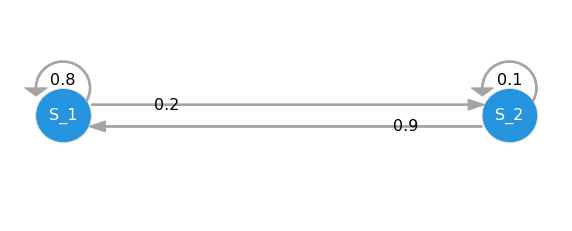

In [3]:
input_state = [0, 1]
P = [[0.8, 0.2],
     [0.9, 0.1]]
mc = MC(np.array(P), ['S_1', 'S_2'])

mc.draw()

In [4]:
def Init(cur_state_matrix):
    post_matrix = [[1]]
    for i in range(len(cur_state_matrix)):
        post_matrix[0].append(cur_state_matrix[i])
    return post_matrix
    
def TimeStep(pre_matrix, state_matrix):
    post_matrix = pre_matrix.copy()
    state_count = len(pre_matrix[0]) - 1
    days_count = len(pre_matrix)
    post_matrix.append([days_count+1])
    for i in range(1, state_count+1):
        prob = 0
        for j in range(1, state_count+1):
            prob += post_matrix[-2][j]*state_matrix[j-1][i-1]
        post_matrix[-1].append(prob);
    return post_matrix

def PrintProbs(probs, timeStep='Time'):
    state_count = len(probs[0]) - 1
    days_count = len(probs)
    table = probs.copy()
    table.insert(0, [timeStep]+[("P(S_"+str(state_index+1)+")") for state_index in range(state_count)])
    print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

In [5]:
probs = Init(input_state)
for i in range(7):
    probs = TimeStep(probs, P)
PrintProbs(probs, 'Day')

╒═══════╤══════════╤══════════╕
│   Day │   P(S_1) │   P(S_2) │
╞═══════╪══════════╪══════════╡
│     1 │ 0        │ 1        │
├───────┼──────────┼──────────┤
│     2 │ 0.9      │ 0.1      │
├───────┼──────────┼──────────┤
│     3 │ 0.81     │ 0.19     │
├───────┼──────────┼──────────┤
│     4 │ 0.819    │ 0.181    │
├───────┼──────────┼──────────┤
│     5 │ 0.8181   │ 0.1819   │
├───────┼──────────┼──────────┤
│     6 │ 0.81819  │ 0.18181  │
├───────┼──────────┼──────────┤
│     7 │ 0.818181 │ 0.181819 │
├───────┼──────────┼──────────┤
│     8 │ 0.818182 │ 0.181818 │
╘═══════╧══════════╧══════════╛


# Завдання 2

В городе издаются три журнала: С_1, С_2, С_3, и читатели выписывают только один из них. Пусть в среднем читатели стремятся поменять журнал, т. е. подписаться на другой не более одного раза в год, и вероятности таких изменений постоянны. Результаты маркетинговых исследований спроса читателей на журналы дали следующее процентное соотношение:
<br>80% читателей С_1 подписываются на С_2;
<br>15% читателей С_2 подписываются на С_3;
<br>8% читателей С_3 подписываются на С_1.
<br>Требуется.
<br>1) записать матрицу переходных вероятностей для средних годовых изменений;
<br>2) предположить, что общее число подписчиков в городе постоянно, и определить, какая доля из их числа будет подписываться на указанные журналы через два года, если по состоянию на 1 января текущего года каждый журнал имел одинаковое число подписчиков;
<br>3) найти вероятности состояний в установившемся режиме и определить журнал, который будет пользоваться наибольшим спросом у читателей.

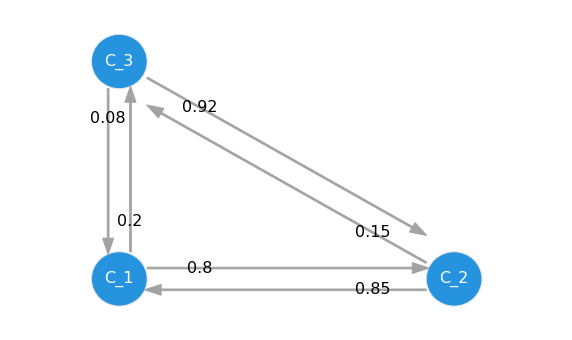

In [6]:
input_state = [1/3, 1/3, 1/3]
P = [[0,    0.8,  0.2],
     [0.85, 0,    0.15],
     [0.08, 0.92, 0]]
mc = MC(np.array(P), ['C_1', 'C_2', 'C_3'])

mc.draw()

In [7]:
probs = Init(input_state)
for i in range(15):
    probs = TimeStep(probs, P)
PrintProbs(probs, 'Year')

╒════════╤══════════╤══════════╤══════════╕
│   Year │   P(S_1) │   P(S_2) │   P(S_3) │
╞════════╪══════════╪══════════╪══════════╡
│      1 │ 0.333333 │ 0.333333 │ 0.333333 │
├────────┼──────────┼──────────┼──────────┤
│      2 │ 0.31     │ 0.573333 │ 0.116667 │
├────────┼──────────┼──────────┼──────────┤
│      3 │ 0.496667 │ 0.355333 │ 0.148    │
├────────┼──────────┼──────────┼──────────┤
│      4 │ 0.313873 │ 0.533493 │ 0.152633 │
├────────┼──────────┼──────────┼──────────┤
│      5 │ 0.46568  │ 0.391521 │ 0.142799 │
├────────┼──────────┼──────────┼──────────┤
│      6 │ 0.344217 │ 0.503919 │ 0.151864 │
├────────┼──────────┼──────────┼──────────┤
│      7 │ 0.44048  │ 0.415089 │ 0.144431 │
├────────┼──────────┼──────────┼──────────┤
│      8 │ 0.36438  │ 0.485261 │ 0.150359 │
├────────┼──────────┼──────────┼──────────┤
│      9 │ 0.4245   │ 0.429834 │ 0.145665 │
├────────┼──────────┼──────────┼──────────┤
│     10 │ 0.377013 │ 0.473612 │ 0.149375 │
├────────┼──────────┼──────────┼

# Завдання 3

У момент часу t_1, t_2, t_3 проводиться огляд ЕОМ. Можливі наступні стани ЕОМ:
<br>S_0 - повністю справна;
<br>S_1 - незначні несправності, які дозволяють експлуатувати ЕОМ;
<br>S_2 - істотні несправності, що дають можливість вирішувати обмежене число завдань;
<br>S_3 - ЕОМ повністю вийшла з ладу.
<br>Матриця перехідних станів має вигляд:
<br>|P_ij| = [[0.5, 0.3, 0.2, 0], [0, 0.4, 0.4, 0.], [0, 0, 0.3, 0.7], [0, 0, 0, 0]]
<br>Побудуйте граф станів. Знайдіть ймовірності станів ЕОМ після одного, двох, трьох оглядів, якщо спочатку (при t = 0) ЕОМ була повністю справна.

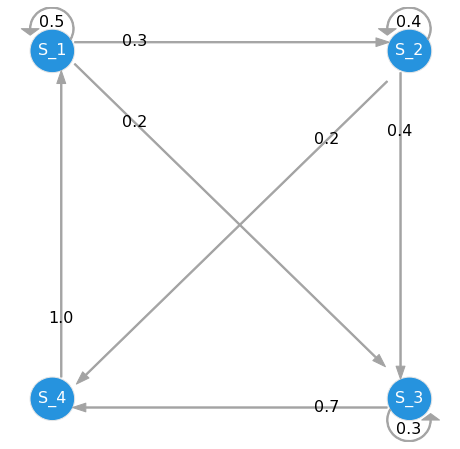

In [8]:
input_state = [1, 0, 0, 0]
P = [[0.5, 0.3, 0.2, 0],
     [0,   0.4, 0.4, 0.2],
     [0,   0,   0.3, 0.7],
     [1,   0,   0,   0]] 
mc = MC(np.array(P), ['S_1', 'S_2', 'S_3', 'S_4'])

mc.draw()

In [9]:
probs = Init(input_state)
for i in range(7):
    probs = TimeStep(probs, P)
PrintProbs(probs, 'Checkup')

╒═══════════╤══════════╤══════════╤══════════╤══════════╕
│   Checkup │   P(S_1) │   P(S_2) │   P(S_3) │   P(S_4) │
╞═══════════╪══════════╪══════════╪══════════╪══════════╡
│         1 │ 1        │ 0        │ 0        │ 0        │
├───────────┼──────────┼──────────┼──────────┼──────────┤
│         2 │ 0.5      │ 0.3      │ 0.2      │ 0        │
├───────────┼──────────┼──────────┼──────────┼──────────┤
│         3 │ 0.25     │ 0.27     │ 0.28     │ 0.2      │
├───────────┼──────────┼──────────┼──────────┼──────────┤
│         4 │ 0.325    │ 0.183    │ 0.242    │ 0.25     │
├───────────┼──────────┼──────────┼──────────┼──────────┤
│         5 │ 0.4125   │ 0.1707   │ 0.2108   │ 0.206    │
├───────────┼──────────┼──────────┼──────────┼──────────┤
│         6 │ 0.41225  │ 0.19203  │ 0.21402  │ 0.1817   │
├───────────┼──────────┼──────────┼──────────┼──────────┤
│         7 │ 0.387825 │ 0.200487 │ 0.223468 │ 0.18822  │
├───────────┼──────────┼──────────┼──────────┼──────────┤
│         8 │ 